In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn

In [3]:
import chardet

In [4]:
df = pd.read_csv("spam.tsv", delimiter = '\t')

In [5]:
df.head()


,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.describe()


,label,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.drop_duplicates(subset='SMS', inplace=True)

In [8]:
df.describe()

,label,SMS
count,5169,5169
unique,2,5169
top,ham,Yes ammae....life takes lot of turns you can o...
freq,4516,1


In [9]:
df.groupby('label').count().reset_index()

,label,SMS
0,ham,4516
1,spam,653


In [10]:
df['len'] = df['SMS'].map(lambda x: len(x))

In [11]:
df.groupby('label').agg({'SMS': 'count', 'len' : 'mean'}).reset_index()

,label,SMS,len
0,ham,4516,70.905890
1,spam,653,137.704441


In [12]:
X = df['SMS']
y = df['label'] 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [15]:
print("Shape of X is {}".format(X.shape))
print("Shape of X_train is {} and shape of y_train is {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is {} and shape of y_test is {}".format(X_test.shape, y_test.shape))

train_corpus = list(X_train)

Shape of X is (5169,)
Shape of X_train is (3876,) and shape of y_train is (3876,)
Shape of X_test is (1293,) and shape of y_test is (1293,)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(train_corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [18]:
import matplotlib.pyplot as plot

Logistic Regression: 
Logistic regression is a statistical technique which is typically used when the dependent variable is dichotomous in nature. It predicts the probability of occurrence of an event by fitting data to a logit function. Logistic regression is a form of binomial regression and is generally used in the case of a dependent variable with two possible values, such as pass/fail, heads/tails, win/lose, etc. The values are typically labelled 0 or 1. Mathematically, the log odds of the outcome is modelled as a combination of the predictor variables.

In [19]:
"""
Implementation of Logistic Regression
"""
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=42)

pipeline = Pipeline([('vectorizer', TfidfVectorizer()), ('classifier', logistic_regression)])

In [20]:
cv_score_logistic_regression = cross_val_score(pipeline, X=X_train, y=y_train, cv=5, n_jobs=4) 
print(cv_score_logistic_regression)

[0.96005155 0.96262887 0.95870968 0.96645161 0.96124031]


In [21]:
def labels(l):
    if (l == "ham"):
        return 1
    else:
        return 0

In [22]:
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve, accuracy_score

In [23]:
pipeline.fit(X_train, y_train)
y_predicted_values = pipeline.predict(X_test)
y_test_lr = [labels(l) for l in list(y_test)]
y_predicted_lr = [labels(l) for l in list(y_predicted_values)]

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_lr, y_predicted_lr, average = "binary")
accuracy = accuracy_score(y_test, y_predicted_values)

precision, recall, _ = precision_recall_curve(y_test_lr, y_predicted_lr)

D:\Users\Programs\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9675174013921114
Precision recall curve:


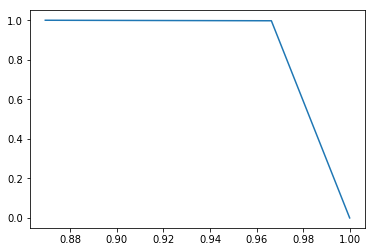

In [24]:
print("Accuracy:", accuracy)
print("Precision recall curve:")
plot.plot(precision,recall)

Random Forest consists of a collection of decision trees (hence the name). To classify a new object based on attributes, each tree gives a classification. This process is called "voting". The forest chooses the classification having the most votes. Random decision forests correct for decision trees' tendency of overfitting to their training set. The first algorithm for random decision forests was created by Tin Kam Ho, and an extension of the algorithm was developed by Leo Breiman and Adele Cutler.

In [25]:
"""
Implementation of Random Forest
"""
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

pipeline = Pipeline([('vectorizer', TfidfVectorizer()), ('classifier', random_forest)])

In [26]:
cv_score_random_forest = cross_val_score(pipeline, X=X_train, y=y_train, cv=5, n_jobs=4) 
print(cv_score_random_forest)

[0.97164948 0.96262887 0.96774194 0.96516129 0.96640827]


In [27]:
pipeline.fit(X_train, y_train)
y_predicted_values = pipeline.predict(X_test)
y_test_lr = [labels(l) for l in list(y_test)]
y_predicted_lr = [labels(l) for l in list(y_predicted_values)]

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_lr, y_predicted_lr, average = "binary")
accuracy = accuracy_score(y_test, y_predicted_values)

precision, recall, _ = precision_recall_curve(y_test_lr, y_predicted_lr)

D:\Users\Programs\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.9651972157772621
Precision recall curve:


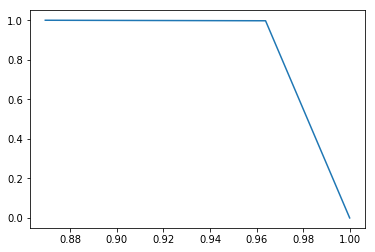

In [28]:
print("Accuracy:", accuracy)
print("Precision recall curve:")
plot.plot(precision,recall)

Naive Bayes algorithm is an algorithm which is based on Bayes theorem with the assumption of independence among predictors. The algorithm "naively" uses Bayes theorem. It is particularly useful for large data sets. The algorithm runs very fast compared to most other algorithms. This makes it especially useful if a very large amount of data is available, which a slower algorithm may not be able to process in a reasonable amount of time. It can be used to make predictions in real time. A major drawback of this algorithm is the fact that it presupposes independence, which is a very strong assumption.

In [29]:
"""
Implementation of Naive Bayes
"""
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

pipeline = Pipeline([('vectorizer', TfidfVectorizer()), ('classifier', naive_bayes)])

In [30]:
cv_score_naive_bayes = cross_val_score(pipeline, X=X_train, y=y_train, cv=5, n_jobs=4) 
print(cv_score_naive_bayes)

[0.94458763 0.95103093 0.94580645 0.95354839 0.94056848]


Accuracy: 0.9651972157772621
Precision recall curve:


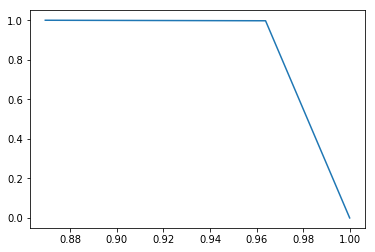

In [31]:
print("Accuracy:", accuracy)
print("Precision recall curve:")
plot.plot(precision,recall)